In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
#Part 1
df1=pd.read_csv('titanic.csv')
df1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df1['Age'].value_counts() #hashvum a qani hogi qani age uni

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [5]:
df1['Fare']=df1['Fare'].astype('int64') #poxuma int64 a dardznum vor bolory nuyny linen

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [7]:
df1.isnull().sum() #Nayum em vortex unem null arjeq

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df1.dropna()
df #jnjum em null arjeqnery

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,B42,S


In [9]:
#encode  enq anum Sex columny 
le = LabelEncoder()
df.loc[:, 'Sex'] = le.fit_transform(df['Sex'])
df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30,B42,S


In [10]:
#Feature engineering-avelacnum enq column 
bins = [0, 30, 60, float('inf')]
labels = ['Young', 'Adult', 'Elderly']
df.loc[:, 'Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

C:\Users\magmu\AppData\Local\Temp\ipykernel_27636\2467221097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71,C85,C,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53,C123,S,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51,E46,S,Adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16,G6,S,Young
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26,C103,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52,D35,S,Adult
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5,B51 B53 B55,S,Adult
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83,C50,C,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30,B42,S,Young


In [11]:
#Part 2 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.273224
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.362868
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.000000


(array([10.,  6., 32., 30., 40., 24., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <BarContainer object of 10 artists>)

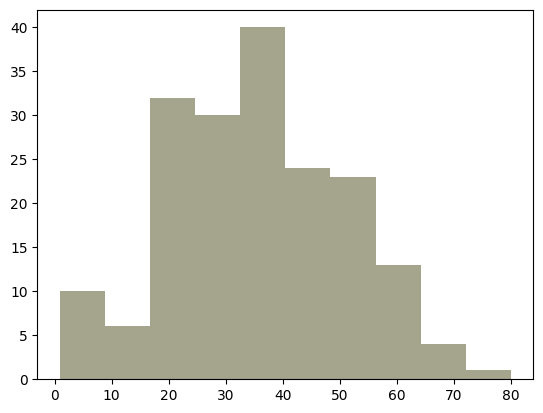

In [12]:
#histogram tariqi veraberyal
plt.hist(df['Age'],color = "#a5a58d")

(array([104.,   0.,   0.,   0.,   0.,  69.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

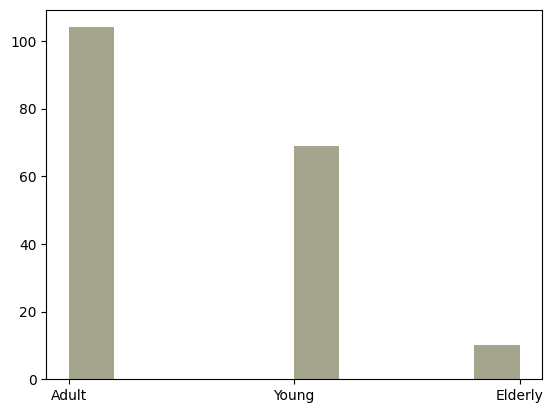

In [13]:
#histogram age groupy kaxvac qanakic
plt.hist(df['Age Group'],color = "#a5a58d")

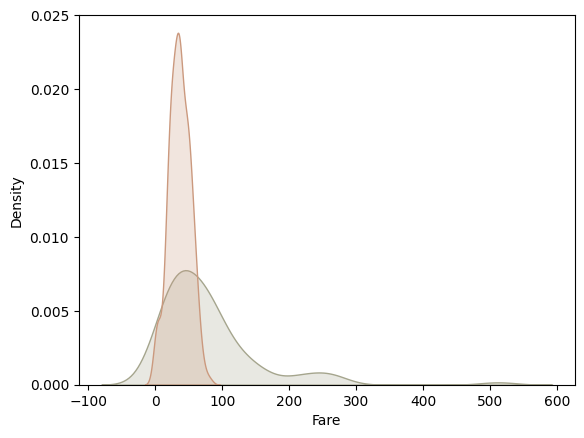

In [14]:
sns.kdeplot(df["Fare"], fill = True, color = "#a5a58d")
sns.kdeplot(df["Age"], fill = True, color = "#cb997e")
plt.show()

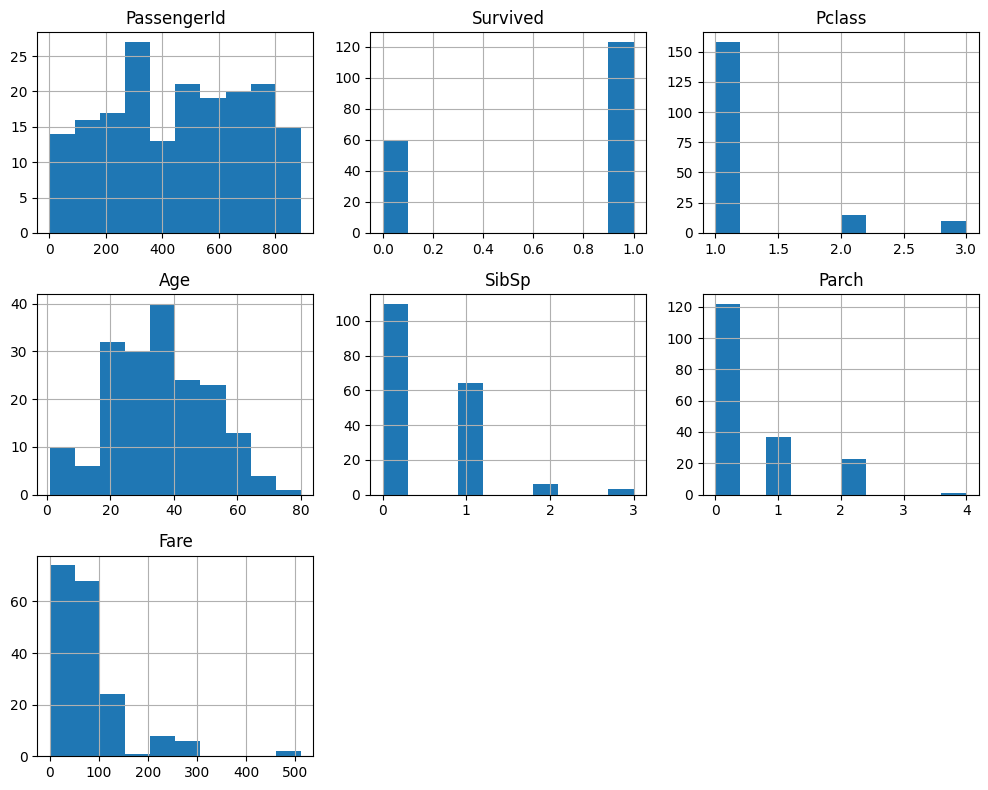

In [15]:
#bolor tvayin histogramnery
df.hist(figsize = (10, 8)) 
plt.tight_layout() 
plt.show()

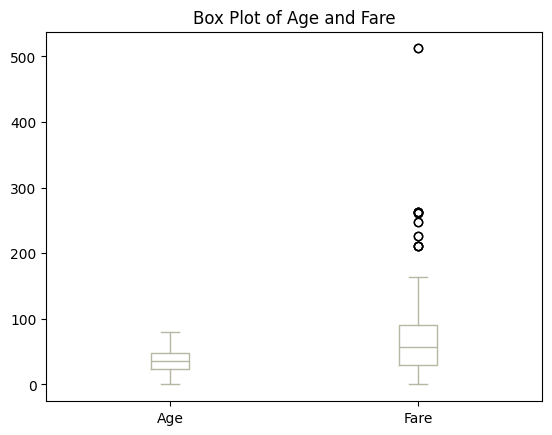

In [16]:
df[['Age', 'Fare' ]].plot(kind='box', color='#b7b7a4')
plt.title('Box Plot of Age and Fare')
plt.show()


In [17]:
#Correlation
corr = df['Age'].corr(df['Sex'])
print('Correlation between Sex and Age:', corr)

Correlation between Sex and Age: 0.18496898559123512


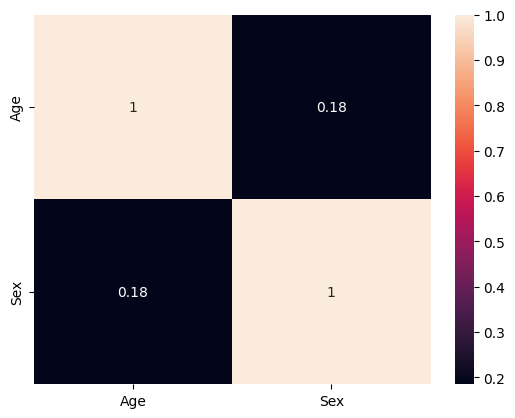

In [18]:
#the vizualization and connection of Sex and Age 
sns.heatmap(df[['Age','Sex']].corr(), annot=True)
plt.show()

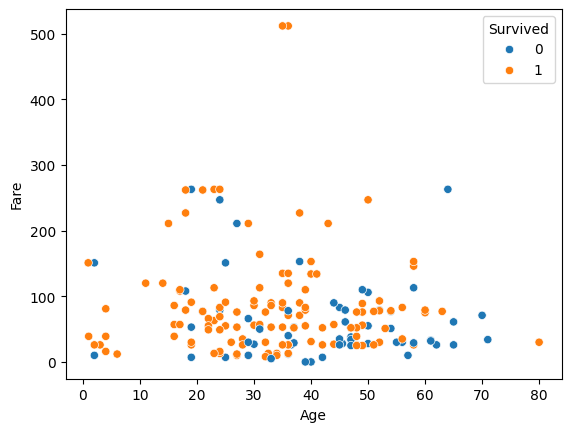

In [19]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df) 
plt.show()

In [28]:
df.loc[:, 'Age Group'] = df['Age Group'].astype('int64')
df.loc[:, 'Age Group'] = le.fit_transform(df['Age Group'])


In [29]:
X = df[['Fare', 'Sex', 'Age Group']]
y = df['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize classifiers 
decision_tree = DecisionTreeClassifier() 
knn = KNeighborsClassifier() 
svm = SVC() 
naive_bayes = GaussianNB()

In [31]:
# Train classifiers 
decision_tree.fit(X_train, y_train) 
knn.fit(X_train, y_train) 
svm.fit(X_train, y_train) 
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [32]:
decision_tree_preds = decision_tree.predict(X_test)
knn_preds = knn.predict(X_test)
svm_preds = svm.predict(X_test)
naive_bayes_preds = naive_bayes.predict(X_test)
#Prediction

In [33]:
#Part 4
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_preds)
#hashvuma accuracy-n

In [34]:
print("Decision Tree Accuracy: ", decision_tree_accuracy)
print("KNN Accuracy: ", knn_accuracy)
print("SVM Accuracy: ", svm_accuracy)
print("Naive Bayes Accuracy: ", naive_bayes_accuracy)

Decision Tree Accuracy:  0.7837837837837838
KNN Accuracy:  0.6216216216216216
SVM Accuracy:  0.6216216216216216
Naive Bayes Accuracy:  0.7567567567567568


In [35]:
#Decistion tree amenalavn a vortev amenamotikn a 1-in

In [36]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
# Classification Matrics

decision_tree_recall = recall_score(y_test, decision_tree_preds, average='weighted')
decision_tree_precision = precision_score(y_test, decision_tree_preds, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_preds, average='weighted')

print("Decision Tree Recall:", decision_tree_recall)
print("Decision Tree Precision:", decision_tree_precision)
print("Decision Tree F1 Score:", decision_tree_f1)

Decision Tree Recall: 0.7837837837837838
Decision Tree Precision: 0.7810810810810811
Decision Tree F1 Score: 0.7799722799722799


In [37]:
knn_recall = recall_score(y_test, knn_preds, average='weighted')
knn_precision = precision_score(y_test, knn_preds, average='weighted')
knn_f1 = f1_score(y_test, knn_preds, average='weighted')

print("KNN Recall:", knn_recall)
print("KNN Precision:", knn_precision)
print("KNN F1 Score:", knn_f1)

KNN Recall: 0.6216216216216216
KNN Precision: 0.6036036036036035
KNN F1 Score: 0.6052252252252251


In [38]:
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

print("SVM Recall:", svm_recall)
print("SVM Precision:", svm_precision)
print("SVM F1 Score:", svm_f1)

SVM Recall: 0.6216216216216216
SVM Precision: 0.3864134404674945
SVM F1 Score: 0.47657657657657654


C:\Users\magmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
naive_bayes_recall = recall_score(y_test, naive_bayes_preds, average='weighted')
naive_bayes_precision = precision_score(y_test, naive_bayes_preds, average='weighted')
naive_bayes_f1 = f1_score(y_test, naive_bayes_preds, average='weighted')

print("Naive Bayes Recall:", naive_bayes_recall)
print("Naive Bayes Precision:", naive_bayes_precision)
print("Naive Bayes F1 Score:", naive_bayes_f1)

Naive Bayes Recall: 0.7567567567567568
Naive Bayes Precision: 0.7732114467408585
Naive Bayes F1 Score: 0.7600413616917744


In [42]:
#Grid search
decision_tree_param_grid = {'max_depth': [None, 10, 20, 30]}
decision_tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=decision_tree_param_grid, cv=10, scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)
print("Decision Tree - Best Parameters:", decision_tree_grid_search.best_params_)
print("Decision Tree - Best Score:", decision_tree_grid_search.best_score_)

Decision Tree - Best Parameters: {'max_depth': 20}
Decision Tree - Best Score: 0.6861904761904762


In [43]:
from sklearn.model_selection import GridSearchCV
decision_tree_param_grid = {'max_depth': [1, 0, None]}
decision_tree_grid_search = GridSearchCV(estimator=decision_tree, param_grid=decision_tree_param_grid, cv=10, scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)
print("Decision Tree - Best Parameters:", decision_tree_grid_search.best_params_)
print("Decision Tree - Best Score:", decision_tree_grid_search.best_score_)

Decision Tree - Best Parameters: {'max_depth': 1}
Decision Tree - Best Score: 0.740952380952381


C:\Users\magmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\magmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\magmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\magmu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

In [44]:
#KNN-i hamar(Nayum enq vori accuracin a aveli mot 1-in u dra hamar enq anum (mer depqum decision treen a )
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn_model = KNeighborsClassifier()

# Define hyperparameters to tune
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# Create GridSearchCV object
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
knn_grid_search.fit(X_train, y_train)

# Get the best parameters
knn_best_params = knn_grid_search.best_params_
print("Best parameters for KNN:", knn_best_params)

# Get the best score
knn_best_score = knn_grid_search.best_score_
print("Best score for KNN:", knn_best_score)

Best parameters for KNN: {'n_neighbors': 3}
Best score for KNN: 0.6848275862068964


In [45]:
#Naive Bayes-i hamar
from sklearn.naive_bayes import GaussianNB

# Define the model
nb_model = GaussianNB()

# Since Naive Bayes does not have any hyperparameters to tune, no grid search is needed.
# vonc haskaca esi dajy karanq chgrenq
# Fit the model to the data
nb_model.fit(X_train, y_train)

# Evaluate the model
nb_score = nb_model.score(X_test, y_test)
print("Accuracy for Naive Bayes:", nb_score)

Accuracy for Naive Bayes: 0.7567567567567568


In [46]:
#Decision tree hamar
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier()

# Define hyperparameters to tune
dt_param_grid = {
    'max_depth': [None, 5, 10, 15]
}

# Create GridSearchCV object
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
dt_grid_search.fit(X_train, y_train)

# Get the best parameters
dt_best_params = dt_grid_search.best_params_
print("Best parameters for Decision Tree:", dt_best_params)

# Get the best score
dt_best_score = dt_grid_search.best_score_
print("Best score for Decision Tree:", dt_best_score)

Best parameters for Decision Tree: {'max_depth': 5}
Best score for Decision Tree: 0.6919540229885057


In [47]:
#SVM-i hamar
from sklearn.svm import SVC

# Define the model
svm_model = SVC()

# Define hyperparameters to tune
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create GridSearchCV object
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

# Get the best parameters
svm_best_params = svm_grid_search.best_params_
print("Best parameters for SVM:", svm_best_params)

# Get the best score
svm_best_score = svm_grid_search.best_score_
print("Best score for SVM:", svm_best_score)

Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best score for SVM: 0.7266666666666667


In [48]:
#Regression part
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

In [50]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
linear_reg_preds = linear_reg.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)
random_forest_reg_preds = random_forest_reg.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_preds)
random_forest_reg_mse = mean_squared_error(y_test, random_forest_reg_preds)

In [53]:
print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree Regression MSE:", decision_tree_reg_mse)
print("Random Forest Regression MSE:", random_forest_reg_mse)

Linear Regression MSE: 0.1718501079380525
Decision Tree Regression MSE: 0.1876417233560091
Random Forest Regression MSE: 0.1656167647553729


In [54]:
from sklearn.metrics import r2_score
linear_reg_r2 = r2_score(y_test, linear_reg_preds)
decision_tree_reg_r2 = r2_score(y_test, decision_tree_reg_preds)
random_forest_reg_r2 = r2_score(y_test, random_forest_reg_preds)

In [55]:
print("Linear Regression R^2 Score:", linear_reg_r2)
print("Decision Tree Regression R^2 Score:", decision_tree_reg_r2)
print("Random Forest Regression R^2 Score:", random_forest_reg_r2)

Linear Regression R^2 Score: 0.2693701932695841
Decision Tree Regression R^2 Score: 0.20223130660131527
Random Forest Regression R^2 Score: 0.2958715809002933


In [59]:
#Grid regressiayi hamar
from sklearn.ensemble import RandomForestRegressor

# Define the model
random_forest_reg = RandomForestRegressor()

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Adjusted max_features values
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')


In [61]:
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest Regression:", best_params_rf)

Best parameters for Random Forest Regression: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [62]:
# Get the best MSE score
best_mse_rf = -grid_search_rf.best_score_
print("Best MSE score for Random Forest Regression:", best_mse_rf)


Best MSE score for Random Forest Regression: 0.17307998750083484


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the model
decision_tree_reg = DecisionTreeRegressor()

# Define hyperparameters to tune
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_dt = GridSearchCV(estimator=decision_tree_reg, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree Regression:", best_params_dt)

# Get the best MSE score
best_mse_dt = -grid_search_dt.best_score_
print("Best MSE score for Decision Tree Regression:", best_mse_dt)

Best parameters for Decision Tree Regression: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best MSE score for Decision Tree Regression: 0.16458424657672044
